In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\SUVARCHALA\\Downloads\\Dataset .csv")

In [6]:
# Handle missing values in 'Cuisines', 'Aggregate rating', and 'Votes'
df = df.dropna(subset=['Cuisines', 'Aggregate rating', 'Votes'])


In [7]:

# Explode the 'Cuisines' column to handle multiple cuisines in a single entry
df['Cuisines'] = df['Cuisines'].str.split(', ')
df = df.explode('Cuisines')

**Analyze the relationship between the type of cuisine and the restaurant's rating**

In [8]:
# Step 1: Analyze the relationship between the type of cuisine and the restaurant's rating
avg_rating_per_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print('\nAverage rating for each cuisine:\n', avg_rating_per_cuisine)



Average rating for each cuisine:
 Cuisines
Sunda             4.900000
B�_rek            4.700000
Taiwanese         4.650000
Ramen             4.500000
Dim Sum           4.466667
                    ...   
Moroccan          1.620000
Awadhi            1.572727
Armenian          1.300000
Mineira           0.000000
Cuisine Varies    0.000000
Name: Aggregate rating, Length: 145, dtype: float64


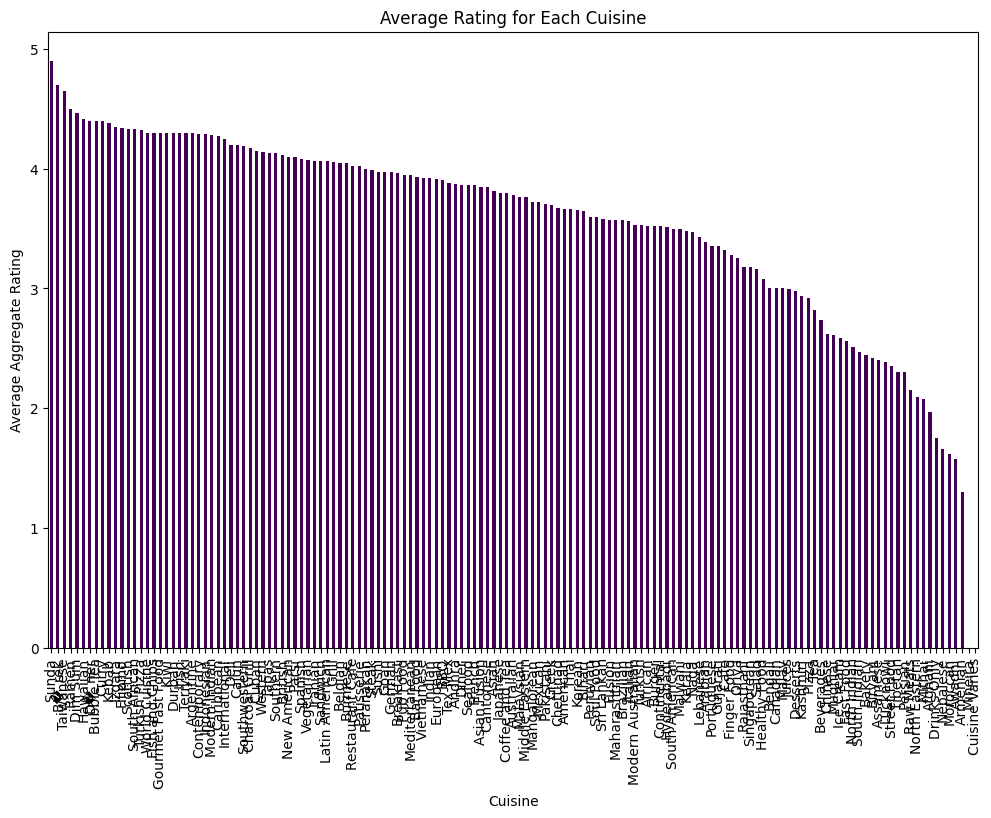

In [9]:
# Plot the average rating per cuisine
plt.figure(figsize=(12, 8))
avg_rating_per_cuisine.plot(kind='bar', colormap='viridis')
plt.title('Average Rating for Each Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

**Identify the most popular cuisines among customers based on the number of votes**

In [10]:
# Step 2: Identify the most popular cuisines among customers based on the number of votes
total_votes_per_cuisine = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print('\nTotal votes for each cuisine:\n', total_votes_per_cuisine)


Total votes for each cuisine:
 Cuisines
North Indian      595981
Chinese           364351
Italian           329265
Continental       288255
Fast Food         184058
                   ...  
Malay                 25
Canadian               6
Peruvian               5
Cuisine Varies         2
Mineira                2
Name: Votes, Length: 145, dtype: int64


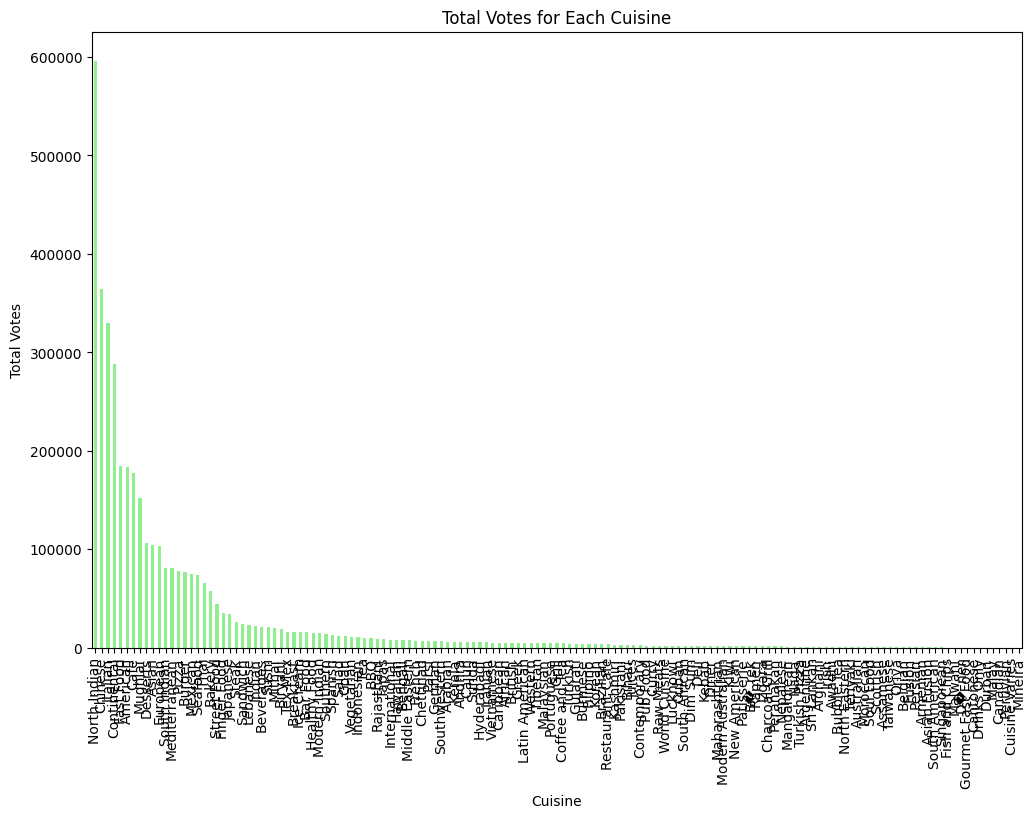

In [12]:
# Plot the total votes per cuisine
plt.figure(figsize=(12, 8))
total_votes_per_cuisine.plot(kind='bar', color='lightgreen')
plt.title('Total Votes for Each Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.show()

**Identify cuisines with above average ratings**

In [13]:
# Identify cuisines with above average ratings
average_rating = df['Aggregate rating'].mean()
cuisines_with_high_ratings = avg_rating_per_cuisine[avg_rating_per_cuisine > average_rating]
print('\nCuisines with above average ratings:\n', cuisines_with_high_ratings)



Cuisines with above average ratings:
 Cuisines
Sunda        4.900000
B�_rek       4.700000
Taiwanese    4.650000
Ramen        4.500000
Dim Sum      4.466667
               ...   
Malay        3.000000
Juices       2.993103
Desserts     2.978867
Kashmiri     2.935000
Pizza        2.921785
Name: Aggregate rating, Length: 119, dtype: float64


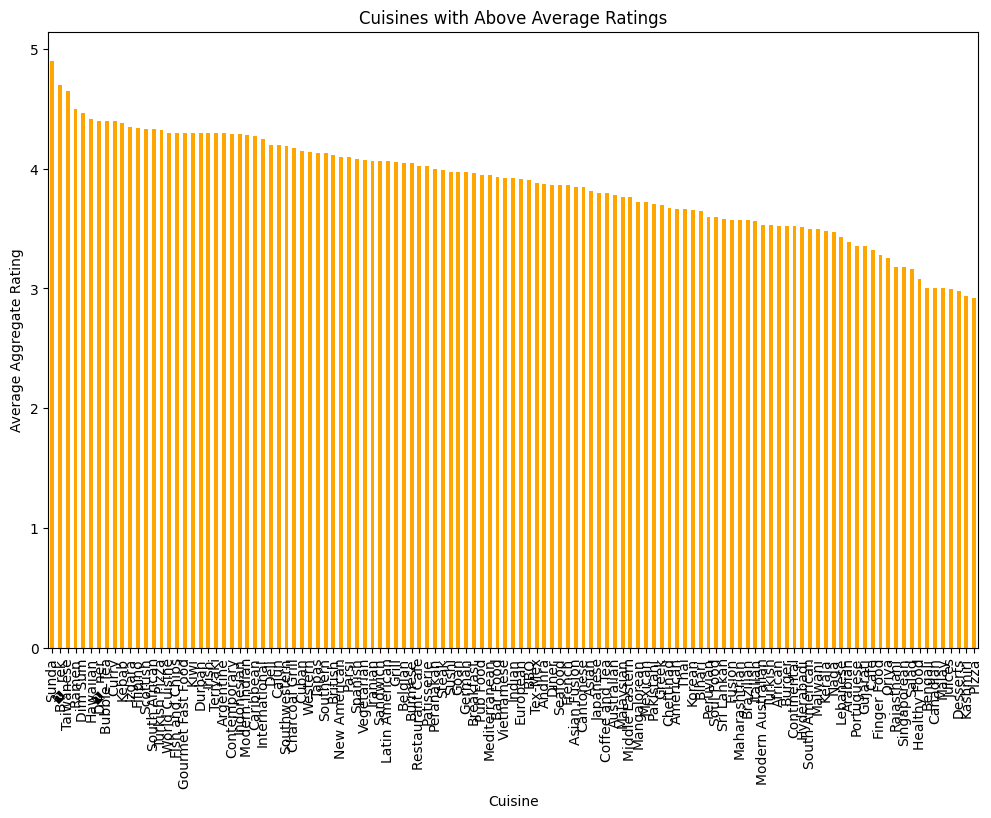

In [14]:
# Plot cuisines with above average ratings
plt.figure(figsize=(12, 8))
cuisines_with_high_ratings.plot(kind='bar', color='orange')
plt.title('Cuisines with Above Average Ratings')
plt.xlabel('Cuisine')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=90)
plt.show()